## **Introduction to Data Science - Nhập môn khoa học dữ liệu - CSC14119**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **Đồ án thực hành cuối kì - Handling Real-World Problem.**
#### **Due:** 24/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Lê Ngọc Thành - Thầy Lê Nhựt Nam.
#### **STT nhóm:** 9.
---
### **Data Modeling - 02**
**Problem**: Làm thế nào để phân nhóm các món ăn dựa trên sự tương đồng về thành phần gia vị và nguyên liệu, giúp người dùng dễ dàng lựa chọn hoặc khám phá các món ăn có đặc điểm chung?

**Description**: Việc phân loại món ăn theo gia vị và nguyên liệu giúp chia các món thành từng nhóm có sự tương đồng cao về thành phần chế biến. Điều này không chỉ hỗ trợ người nấu tìm kiếm các món ăn phù hợp với nguyên liệu sẵn có mà còn giúp hệ thống gợi ý món ăn theo sở thích hoặc nhu cầu. Ví dụ, những món ăn có cùng loại gia vị đặc trưng như ớt, tỏi, hoặc cùng nhóm nguyên liệu như thịt gà, rau xanh sẽ được xếp vào cùng một nhóm, giúp quá trình lựa chọn món trở nên nhanh chóng và khoa học hơn.

**Solution**: Sử dụng mô hình K-Means Clustering.

### 1. Xác định số cụm phù hợp bằng phương pháp Khuỷu tay (Elbow Method)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.set_option('display.max_colwidth', None)

In [2]:
ingredients_df = pd.read_csv("../Assert/ingredients.csv",sep=",")

# Xóa các dòng bị lặp
ingredients_df.drop_duplicates(keep='first',inplace=True)

# Xóa các dòng toàn giá trị 0
ingredients_df = ingredients_df.loc[~(ingredients_df.iloc[:,1:] == 0).all(axis=1)]

ingredients_df.head()

Name of dish  soda  \
0              10 common problems and mistakes when making bread     0   
1                              11 ways to use leftover egg yolks     0   
2                                    12 types of nuts for baking     0   
3  14 ways to make Sponge cake/Gato for birthday cake decoration     0   
4                             14 ways to use leftover egg whites     0   

   turmeric mixture  herb  yogurt  butter  beef bone  \
0                 0     0       0       0          0   
1                 0     0       0       0          0   
2                 0     0       0       0          0   
3                 0     0       0       0          0   
4                 0     0       0       1          0   

   chili lemongrass fish sauce  beef fillet  chipotle smoked pepper powder  \
0                            0            0                              0   
1                            0            0                              0   
2                            0            0                              0   
3                            0            0                              0   
4                            0            0                              0   

   ...  kiwi  lime juice  tea leaves  white sesame  eel  green onion  \
0  ...     0           0           0             0    0            0   
1  ...     0           0           0             0    0            0   
2  ...     0           0           0             0    0            0   
3  ...     0           0           0             0    0            0   
4  ...     0           0           0             0    0            0   

   ice cubes  pigeon  chinese sausages  white vinegar  
0          0       0                 0              0  
1          0       0                 0              0  
2          0       0                 0              0  
3          0       0                 0              0  
4          0       0                 0              0  

[5 rows x 814 columns]

In [3]:
ingredients = ingredients_df.iloc[:,1:]
dishes = ingredients_df.iloc[:,0] 

c:\Users\hoang\anaconda3\envs\min_ds-env2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


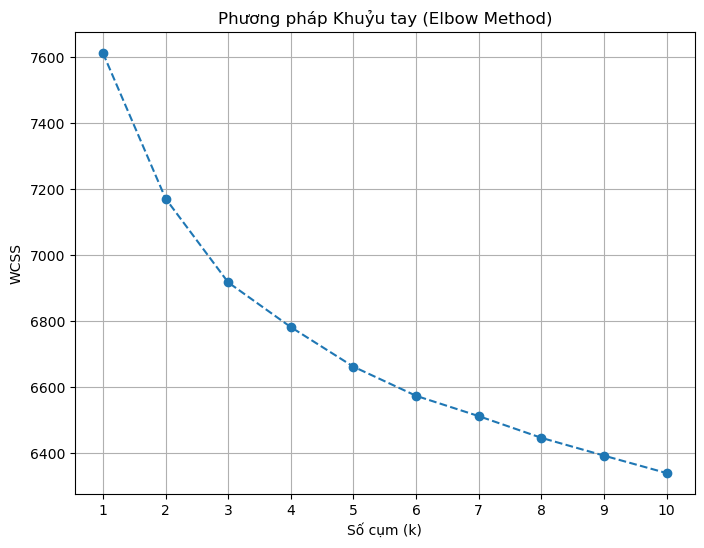

In [4]:
# Tránh bị memory leak khi sử dụng thuật toán KMeans
import os
os.environ["OMP_NUM_THREADS"] = "4"

# Danh sách để lưu giá trị WCSS
wcss = []

# Duyệt qua các giá trị k từ 1 đến 10 
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(ingredients)
    wcss.append(kmeans.inertia_)  

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8,6))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.xticks(K_values)
plt.grid(True)
plt.show()

#### Nhận xét chung
- Từ k = 1 đến k = 3: Đường cong giảm khá mạnh, cho thấy việc tăng số cụm từ 1 lên 3 giúp giảm đáng kể WCSS.

- Từ k = 3 trở đi: Đường cong tiếp tục giảm nhưng với tốc độ chậm hơn nhiều.

#### Kết luận
- Dựa vào biểu đồ, có thể cho rằng điểm **khuỷu tay** nằm ở vị trí k = 3. 

### 2. Xây dựng mô hình K-Means Clustering với số cụm = 3

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(ingredients)

predict_labels = kmeans.predict(ingredients)

In [6]:
# Lấy các món ăn cùng label vào 1 nhóm
def group_dishes(predict_labels):
    first_group = dishes[predict_labels == 0]
    second_group =  dishes[predict_labels == 1]
    third_group =  dishes[predict_labels == 2]

    return (first_group, second_group, third_group)

In [7]:
# Lưu các phần tử chung cụm thành các mảng 
first_group, second_group, third_group = group_dishes(predict_labels)

In [26]:
first_group.to_frame().sample(5)

Name of dish
979                      Almond Cookies
58        Chocolate Vanilla Butter Cake
199   How to make crispy sesame cookies
322       Rosemary Garlic Challah Bread
1021                        Mango Bread

In [27]:
second_group.to_frame().sample(5)

Name of dish
599                          Dulce De Leche Sauce
655        Super Fast Club Sandwich For Breakfast
123              Garlic and Scallion Butter Bread
1024  Super Fast Strawberry Jam With Fruit Pectin
1003                    Milk Jam (Dulce De Leche)

In [28]:
third_group.to_frame().sample(5)

Name of dish
795                          Fried Avocado with Cosori Air Fryer
891              Pan-Fried Pork Cutlets with Lemon Mustard Sauce
848                                     Instant Pot Chicken Soup
799                                 French Fries Using Air Fryer
522  Sauteed Ham – Traditional Northern Dish, Rich in Tet Flavor

### Nhận xét
- Ở nhóm đầu tiên, đa phần là các **món bánh**.

- Ở nhóm thứ 2 chủ yếu là các **món ăn vặt**, **chè**, **thức uống tráng miệng**.

- Ở nhóm thứ 3, các món có xu hướng được làm từ **thịt**, **cá**, **tôm**.

In [11]:
def printRecipes(substitute_recipes):
    for recipe, substitutes in substitute_recipes.items():
        print(f"Substitutive dishes for: {recipe}")
        for i, substitute in enumerate(substitutes):
            print(f"{i + 1}. {substitute}")
        print("")

In [12]:
def substituteRecipes(recipes):
    subsitiute_recipes = {}
    
    for recipe in recipes:
        if recipe in first_group.values:
            subsitiute_recipes[recipe] = first_group.sample(5).values
        elif recipe in second_group.values:
            subsitiute_recipes[recipe] = second_group.sample(5).values
        elif recipe in third_group.values:
            subsitiute_recipes[recipe] = third_group.sample(5).values

    return subsitiute_recipes

In [13]:
input = ['Muesli','Grilled Orange Chicken','Chocolate Ricotta Muffin']
substitute_recipes = substituteRecipes(input)
printRecipes(substitute_recipes)

Substitutive dishes for: Muesli
1. Lemon Cream Pie
2. Sicilian Potato Salad (Insalata Di Patate)
3. Watermelon Lassi
4. Sweet almond candy with cinnamon sugar flavor
5. Chrysanthemum Honey

Substitutive dishes for: Grilled Orange Chicken
1. Grilled Beef Skewers With Vegetables, Smoked, Not Inferior To Charcoal, Just With An Air Fryer
2. Korean Mixed Rice (Bibimbap)
3. How to make Potato Pancake
4. Zucchini Noodles with Shrimp Sauce
5. How to Make Singapore Frog Porridge as Delicious as in Restaurants

Substitutive dishes for: Chocolate Ricotta Muffin
1. How to make Fennel Seed Cookies
2. Sweet chocolate cake for Valentine's Day
3. Chocolate Ricotta Muffin
4. Almond Butter Cookies
5. How to make chocolate cake in microwave – Chocolate Mug Cake



### 3. Đánh giá, phân tích mô hình

In [14]:
def convertInputToVector(input):
    ingredients_list = ingredients_df.columns[1:]
    input_df = pd.DataFrame([ingredients_list.isin(input)],columns=ingredients_list)

    return input_df

In [72]:
input_1 = ["shrimp","salt","pork","fish sauce"] # Tôm thịt kho nước mắm :)))
input_2 = ["sugar","all-purpose flour","salt","apple","egg","butter"] # Bánh táo :)))
input_3 = ["milk","aloe vera","sugar"] # Sữa nha đam 
input_4 = ["chicken","pepper","carrot","salt","potato"] # Gà hầm rau củ
input_5 = ["sugar","egg","banana","salt","vanilla extract","milk","baking powder"] # Bánh chuối hương vani :)))
input_6 = ["tuna","beef bone","shrimp"] # Cá bò tôm :)))

processed_input = [convertInputToVector(input_1)
                 ,convertInputToVector(input_2)
                 ,convertInputToVector(input_3)
                 ,convertInputToVector(input_4)
                 ,convertInputToVector(input_5)
                 ,convertInputToVector(input_6)]

for input in processed_input:
    pred = kmeans.predict(input)
    if pred == 0:
        print(pred, "- Món bánh")
    elif pred == 1:
        print(pred, "- Món sữa, chè, thức uống tráng miệng") 
    elif pred == 2:
        print(pred, "- Món mặn")   

[2] - Món mặn
[0] - Món bánh
[1] - Món sữa, chè, thức uống tráng miệng
[2] - Món mặn
[0] - Món bánh
[1] - Món sữa, chè, thức uống tráng miệng


#### **Nhận xét**
- Ta thấy các món mặn: **Tôm thịt kho nước mắm** và **gà hầm rau củ** chung nhóm. Các món bánh: **Bánh táo** và **bánh chuối hương vani** chung nhóm. **Sữa nha đam** thuộc về nhóm còn lại. 

- Tuy nhiên, món **cá bò tôm** lại cùng nhóm với **sữa nha đam** (lẽ ra nó phải thuộc nhóm **mặn**), cho thấy rằng nếu số lượng nguyên liệu ít thì dễ bị phân cụm nhầm sang nhóm **sữa, chè, thức uống tráng miệng**.

- **Chung quy lại, nếu số lượng nguyên liệu đủ, mô hình K-Means phân cụm gần như đúng với dự đoán ban đầu.**

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def modelEvaluation(model):
    inertia = model.inertia_
    silhouette_avg = silhouette_score(ingredients, predict_labels)
    db_index = davies_bouldin_score(ingredients, predict_labels)

    return (inertia, silhouette_avg, db_index)

In [17]:
eval_score = modelEvaluation(kmeans)
print("Evaluation Score")
print(f"- Inertia: {eval_score[0]}")
print(f"- Silhouette score: {eval_score[1]}")
print(f"- Davies Bouldin score: {eval_score[2]}")

Evaluation Score
- Inertia: 6917.189103598309
- Silhouette score: 0.04549024874326191
- Davies Bouldin score: 4.03154304688805


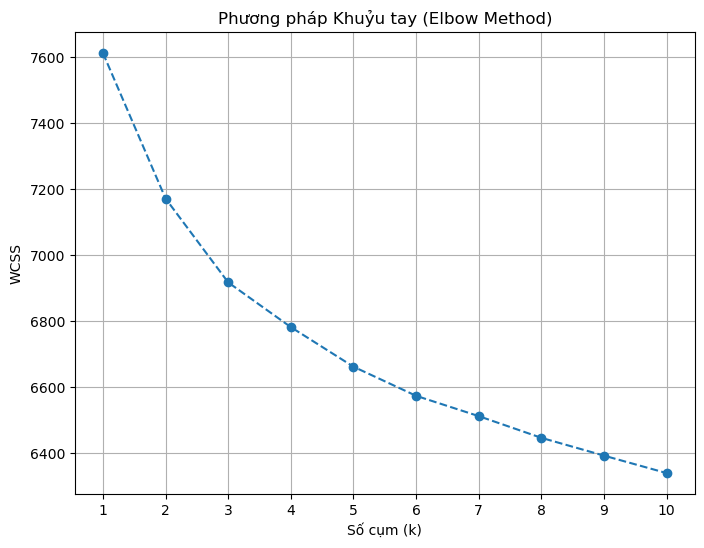

#### **Nhận xét**
**Inertia: 6917.19 (k = 3)**

- Tổng khoảng cách bình phương từ các điểm dữ liệu đến tâm cụm đã giảm, cho thấy sự cải thiện về độ chặt chẽ của các cụm khi chọn 
k = 3.

**Silhouette Score: 0.045**

- Giá trị này khá thấp, cho thấy các cụm vẫn còn chồng lấn, các điểm dữ liệu không được phân tách rõ ràng.

**Davies-Bouldin Score: 4.03**

- Chỉ số này tương đối cao, phản ánh các cụm chưa thực sự phân biệt tốt và còn có sự tương đồng giữa các cụm.

#### **Kết luận**
- Số cụm k = 3 là hợp lý theo Elbow Method.

- Tuy nhiên, các chỉ số đánh giá như Silhouette và Davies-Bouldin cho thấy kết quả phân cụm chưa đạt chất lượng cao, các cụm còn khá mờ nhạt, cho thấy cần cải thiện thêm dữ liệu hoặc thử nghiệm các phương pháp phân cụm khác để đạt kết quả tốt hơn.

### 4. Giao diện GUI

In [18]:
import tkinter as tk
from tkinter import messagebox

In [19]:
class SubstituteRecipeRecommender:
    def __init__(self, root):
        self.root = root
        self.root.title("Hệ thống đề xuất món ăn thay thế")

        # Kích thước cửa sổ
        self.window_width = 800
        self.window_height = 500

        # Lấy kích thước màn hình
        screen_width = self.root.winfo_screenwidth()
        screen_height = self.root.winfo_screenheight()

        # Tính toán tọa độ x và y để cửa sổ ở chính giữa
        x = (screen_width // 2) - (self.window_width // 2)
        y = (screen_height // 2) - (self.window_height // 2)

        # Đặt kích thước và vị trí cửa sổ
        self.root.geometry(f"{self.window_width}x{self.window_height}+{x}+{y}")

        self.bg_photo = tk.PhotoImage(file="Background.png")

        # Canvas
        self.canvas = tk.Canvas(self.root, width=self.window_width, height=self.window_height, highlightthickness=0)
        self.canvas.grid(row=0, column=0, sticky="nsew")

        # Đặt ảnh nền
        self.canvas.create_image(0, 0, anchor="nw", image=self.bg_photo)

        # Thiết lập grid để Canvas mở rộng khi thay đổi kích thước
        self.root.grid_rowconfigure(0, weight=1)
        self.root.grid_columnconfigure(0, weight=1)

        # Label
        self.label = tk.Label(self.canvas,text="Input recipes:",bg="brown",fg='white',font=("calibri",16,"bold"),relief='solid')
        self.label.place(x=163, y=50)

        # Entry để nhập nguyên liệu
        self.entry = tk.Entry(self.canvas,width=27,font=("Calibri", 16),relief='solid',bd=2)
        self.entry.place(x=80, y=100)

        # Button để gợi ý món ăn
        self.recommend_button = tk.Button(self.canvas,text="ENTER",command=self.recommend,bg='brown',fg='white',font=("calibri",16,"bold"),relief=tk.RAISED)
        self.recommend_button.place(x=190, y=150)

        # Label để hiển thị kết quả
        self.result_label = tk.Label(self.canvas,text="",justify="left",anchor="w",font=("calibri",15),width=64,height=6,relief="solid")
        self.result_label.place(x=70, y=240) 

    def recommend(self):
        recipe = self.entry.get()
        substitute_recipes = substituteRecipes([recipe])

        if substitute_recipes:
            recipe_text = ""
            for i, substitute in enumerate(substitute_recipes[recipe]):
                recipe_text +=  f"{i + 1}. {substitute}\n"
            self.result_label.config(text=recipe_text, wraplength=630)
            
        else:
            self.result_label.config(text="Không tìm thấy món ăn phù hợp!")

In [20]:
root = tk.Tk()
app = SubstituteRecipeRecommender(root)
root.mainloop()